# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
stop_words = stopwords.words('english')
stop = list(stop_words)

emo = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [4]:
tokenized = word_tokenize(macbeth_string)
print(tokenized)

['cover', 'macbeth', 'by', 'william', 'shakespeare', 'contents', 'act', 'i', 'scene', 'i.', 'an', 'open', 'place', '.', 'scene', 'ii', '.', 'a', 'camp', 'near', 'forres', '.', 'scene', 'iii', '.', 'a', 'heath', '.', 'scene', 'iv', '.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'v.', 'inverness', '.', 'a', 'room', 'in', 'macbethâ\x80\x99s', 'castle', '.', 'scene', 'vi', '.', 'the', 'same', '.', 'before', 'the', 'castle', '.', 'scene', 'vii', '.', 'the', 'same', '.', 'a', 'lobby', 'in', 'the', 'castle', '.', 'act', 'ii', 'scene', 'i.', 'inverness', '.', 'court', 'within', 'the', 'castle', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'scene', 'iv', '.', 'the', 'same', '.', 'without', 'the', 'castle', '.', 'act', 'iii', 'scene', 'i.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'another', 'room', 'in', 'the', 'palace', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'a', 'park'

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * Note: if the compound score is 0, the word should not have been added to either list

In [5]:
positive = []
negative = []

for t in tokenized:
    if emo.polarity_scores(t)['compound']>0:
      positive.append(t)
    elif emo.polarity_scores(t)['compound']<0:
      negative.append(t)
    print(positive)  
    print(negative)

      

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['lobby', 'play', 'won', 'fair', 'fair', 'like', 'good', 'hardy', 'brave', 'friend', 'worthy', 'smiling', 'like', 'brave', 'well', 'like', 'worthy', 'comfort', 'justice', 'trust', 'fresh', 'yes', 'help', 'well', 'honour', 'worthy', 'god', 'save', 'worthy', 'great', 'fan', 'spirit', 'great', 'happiness', 'interest', 'greet', 'noble', 'won', 'like', 'kind', 'hand', 'hand', 'peace', 'fair', 'like', 'hail', 'hail', 'hail', 'hail', 'hail', 'good', 'fair', 'truth', 'fantastical', 'noble', 'greet', 'grace', 'great', 'noble', 'hope', 'favours', 'hail', 'hail', 'hail', 'greater', 'happy', 'happier', 'hail', 'hail', 'prosperous', 'prospect', 'intelligence', 'greeting', 'happily', 'success', 'praises', 'contend', 'stout', 'praises', 'great', 'defence', 'thanks', 'earnest', 'greater', 'honour', 'hail', 'worthy', 'true', 'help', 'greatest', 'thanks', 'hope', 'trusted', 'win', 'truths', 'win', 'honest', 'pray', 'truths', 'happy', 'thank', 'good', 'earnest', 'success', 'truth', 'good', 'fantastical',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['murderers', 'ghost', 'witch', 'witch', 'lost', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'bloody', 'fought', 'leave', 'doubtful', 'choke', 'rebel', 'villainies', 'damned', 'whore', 'weak', 'bloody', 'shook', 'battlements', 'direful', 'discomfort', 'no', 'assault', 'foe', 'reeking', 'cry', 'strange', 'terrible', 'dismal', 'conflict', 'confronted', 'rebellious', 'no', 'deceive', 'death', 'lost', 'witch', 'witch', 'killing', 'witch', 'witch', 'witch', 'cries', 'witch', 'witch', 'witch', 'witch', 'forbid', 'weary', 'lost', 'witch', 'witch', 'witch', 'weird', 'forbid', 'witch', 'witch', 'witch', 'fear', 'fear', 'hate', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'imperfect', 'death', 'no', 'strange', 'stop', 'insane', 'prisoner', 'fight', 'strange', 'death', 'pay', 'devil', 'lose', 'rebel', 'pains', 'no', 'strange', 'harm', 'darkness', 'ill', 'ill', 'horrid', 'fears', 'horrible', 'murder', 'strange', 'dull', 'forgotten', 'pains', 'die', 'died', 'dea

For any list `mylist`, you can get the word frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use these commands to:
1. find the 15 most common negative words in Macbeth and the 15 most common positive words
2. make a horizontal bar plot similar to the plots in the following image
3. comment on similarities and differences to the Macbeth plot below

(Plot taken from https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/)

![Pos-Neg-Words in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-19-1.png)

<AxesSubplot: ylabel='Word'>

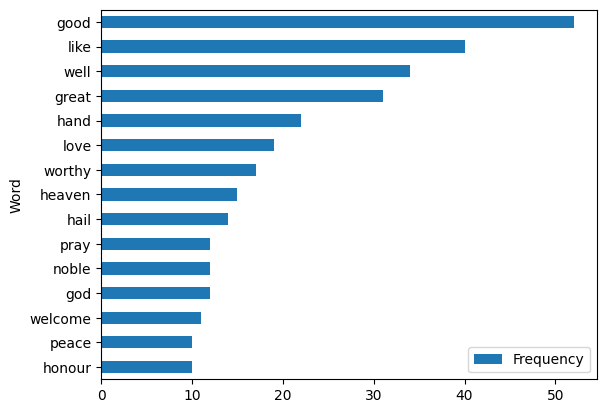

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
pos=nltk.FreqDist(positive).most_common(15)

#make a dataframe from pos list
df=pd.DataFrame(pos)
#add column names 
df.columns=['Word', 'Frequency']
desc=df.sort_values('Frequency', ascending=True)
desc.plot(x='Word', y='Frequency', kind='barh')

<AxesSubplot: ylabel='Word'>

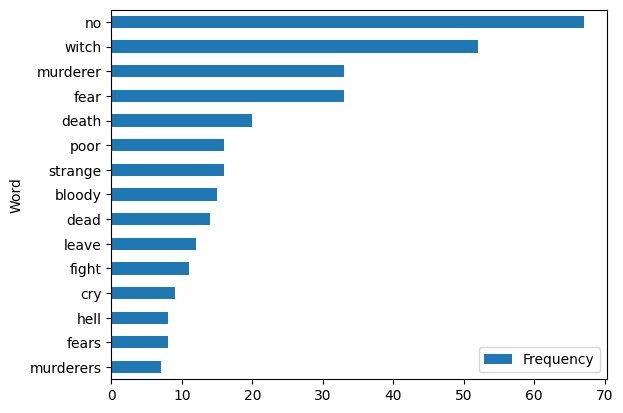

In [7]:
neg=nltk.FreqDist(negative).most_common(15)
ab=pd.DataFrame(neg)
ab.columns=['Word', 'Frequency']
descend=ab.sort_values('Frequency', ascending=True)
descend.plot(x='Word', y='Frequency', kind='barh')

The similarities between the provided plot and mine include the overall shape of the bar graphs and the fact that most of the words overlap. However the difference is the order of the words. For example, in the provided negative graph, the most appeared word is fear. On the other hand, mine shows witch on the very top. Additionally, while the provided positive graph has higher frequency than the negative one, mine shows the opposite. 

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

In [8]:
from string import punctuation
myStopWords = list(punctuation) + stop_words
macnostop =[]
#search through the tokenized list
for i in tokenized:
  #if the word does not have any punctuation and stop words
  if i not in myStopWords:
    #add to macnostop
    macnostop.append(i)
print(macnostop)
positivenostop = []
negativenostop = []

#make a new list with all the positive and negative words w
for i in macnostop:
    if emo.polarity_scores(i)['compound']>0:
      positivenostop.append(i)
    elif emo.polarity_scores(i)['compound']<0:
      negativenostop.append(i)
    print(positivenostop)
    print(negativenostop)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<AxesSubplot: ylabel='Word'>

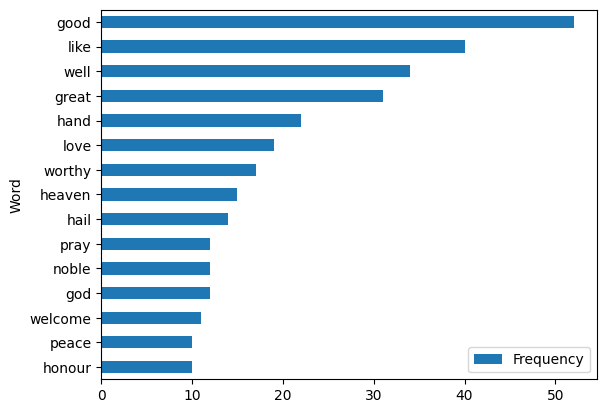

In [9]:
pns=nltk.FreqDist(positivenostop).most_common(15)

#make a dataframe from pos list
qw=pd.DataFrame(pns)
#add column names 
qw.columns=['Word', 'Frequency']
descending=qw.sort_values('Frequency', ascending=True)
descending.plot(x='Word', y='Frequency', kind='barh')

<AxesSubplot: ylabel='Word'>

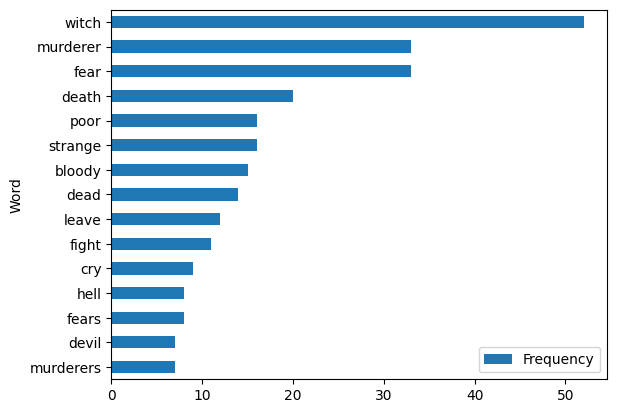

In [10]:
nns=nltk.FreqDist(negativenostop).most_common(15)

cd=pd.DataFrame(nns)
#add column names 
cd.columns=['Word', 'Frequency']
des=cd.sort_values('Frequency', ascending=True)
des.plot(x='Word', y='Frequency', kind='barh')

Nothing changed except the fact that "no" disappeared from the negative graph. 

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

In [11]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
macnostop_stemmed = []
for i in macnostop:
    macnostop_stemmed.append(p_stemmer.stem(i))   
print(macnostop_stemmed)

['cover', 'macbeth', 'william', 'shakespear', 'content', 'act', 'scene', 'i.', 'open', 'place', 'scene', 'ii', 'camp', 'near', 'forr', 'scene', 'iii', 'heath', 'scene', 'iv', 'forr', 'room', 'palac', 'scene', 'v.', 'inver', 'room', 'macbethâ\x80\x99', 'castl', 'scene', 'vi', 'castl', 'scene', 'vii', 'lobbi', 'castl', 'act', 'ii', 'scene', 'i.', 'inver', 'court', 'within', 'castl', 'scene', 'ii', 'scene', 'iii', 'scene', 'iv', 'without', 'castl', 'act', 'iii', 'scene', 'i.', 'forr', 'room', 'palac', 'scene', 'ii', 'anoth', 'room', 'palac', 'scene', 'iii', 'park', 'lawn', 'gate', 'lead', 'palac', 'scene', 'iv', 'room', 'state', 'palac', 'scene', 'v.', 'heath', 'scene', 'vi', 'forr', 'room', 'palac', 'act', 'iv', 'scene', 'i.', 'dark', 'cave', 'middl', 'cauldron', 'boil', 'scene', 'ii', 'fife', 'room', 'macduffâ\x80\x99', 'castl', 'scene', 'iii', 'england', 'kingâ\x80\x99', 'palac', 'act', 'v', 'scene', 'i.', 'dunsinan', 'room', 'castl', 'scene', 'ii', 'countri', 'near', 'dunsinan', 'scen

In [12]:
posistem=[]
negstem=[]
for i in macnostop_stemmed:
    if emo.polarity_scores(i)['compound']>0:
      posistem.append(i)
    elif emo.polarity_scores(i)['compound']<0:
      negstem.append(i)
    print(posistem)
    print(negstem)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['witch', 'murder', 'ghost', 'witch', 'witch', 'witch', 'lost', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'fought', 'doubt', 'choke', 'rebel', 'damn', 'whore', 'weak', 'disdain', 'shook', 'battlement', 'dire', 'discomfort', 'assault', 'foe', 'reek', 'dismal', 'conflict', 'confront', 'death', 'lost', 'witch', 'witch', 'witch', 'kill', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'forbid', 'lost', 'witch', 'witch', 'witch', 'weird', 'forbid', 'witch', 'witch', 'witch', 'fear', 'fear', 'hate', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'witch', 'imperfect', 'death', 'stop', 'prison', 'fight', 'death', 'pay', 'devil', 'lose', 'rebel', 'treason', 'pain', 'harm', 'ill', 'ill', 'horrid', 'fear', 'murder', 'shake', 'dull', 'forgotten', 'pain', 'die', 'treason', 'die', 'death', 'careless', 'sin', 'pay', 'pay', 'hide', 'drop', 'hide', 'fire', 'fear', 'weird', 'lose', 'fear', 'ill', 'fear', 'mad', 'dead', 'fatal', 'battlement', 'stop', 'shake', 'm

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<AxesSubplot: ylabel='Word'>

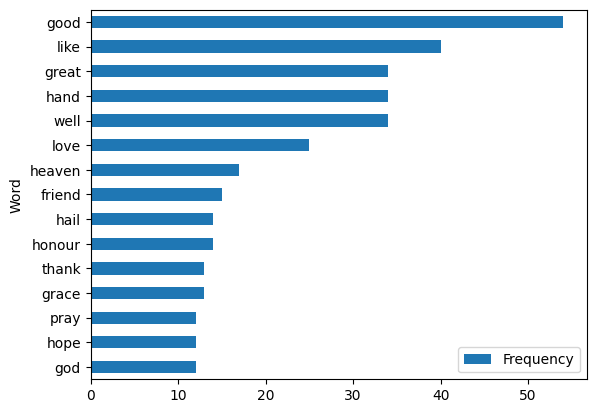

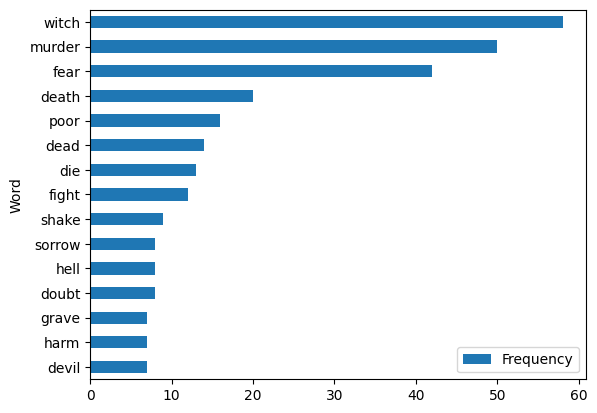

In [13]:
ps=nltk.FreqDist(posistem).most_common(15)

#make a dataframe from pos list
ef=pd.DataFrame(ps)
#add column names 
ef.columns=['Word', 'Frequency']
descending1=ef.sort_values('Frequency', ascending=True)
descending1.plot(x='Word', y='Frequency', kind='barh')

ns=nltk.FreqDist(negstem).most_common(15)

gh=pd.DataFrame(ns)
#add column names 
gh.columns=['Word', 'Frequency']
des1=gh.sort_values('Frequency', ascending=True)
des1.plot(x='Word', y='Frequency', kind='barh')

In the negative graph, "fear" and "fears" are now counted together and "murderer" and "murderers" are combined to "murder".  Also, overall there are new words that now appear such as "shake" and "grace".

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):
![Sentiment Evolution in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-11-1.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by summing the compound scores of all the words in that scene
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

    Number  Sentiment
0        0    -0.5160
1        1     0.4390
2        2    13.3498
3        3    14.6818
4        4     5.0405
5        5    19.4683
6        6     4.3679
7        7    32.1879
8        8    16.8615
9        9    18.2797
10      10    14.0393
11      11     7.3309
12      12    -2.5775
13      13   -11.1692
14      14    -2.2934
15      15     5.2064
16      16    10.7861
17      17     3.0986
18      18     4.3607
19      19    -6.2979
20      20     0.3249
21      21   -12.1500
22      22    -6.7841
23      23    -2.7154
24      24   -33.3969


<AxesSubplot: xlabel='Number'>

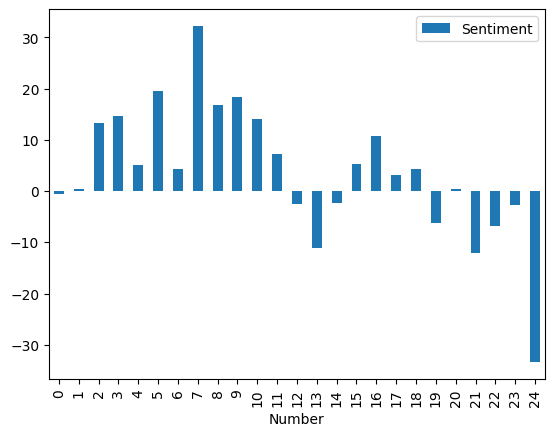

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment=[]
#make a dataframe
df=pd.DataFrame(r_j_scenes)
#make a new list that has 0 to 24 for the scene number
number=list(range(0,25))
#make a new column Number which assigns number to each scene 
df.columns=['Number']
df['Number']=number
#iterate through each scene
for i in r_j_scenes:
  total=0
  #tokenize the scene
  rj=word_tokenize(i)
  #within each tokenized list, iterate through each word
  for j in rj:
    #add up compound polarity score for each word in the list
    total=total+emo.polarity_scores(j)['compound']
  sentiment.append(total)

#make a dataframe 
#add a sentiment column with the total sentiment scores for each scene
df['Sentiment']=sentiment
print(df)
#sort by the scene number
plot1=df.sort_values('Number')
plot1.plot(x='Number', y='Sentiment', kind='bar')


My plot resembles the overall trend of the provided plot above. While it is predominantly positive in the first half of the story, it becomes extremely negative in the second half. 

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

    Number  Sentiment
0        0    -0.5160
1        1     0.4390
2        2    13.3498
3        3    14.6818
4        4     5.0405
5        5    19.4683
6        6     4.3679
7        7    32.1879
8        8    16.8615
9        9    18.2797
10      10    14.0393
11      11     7.3309
12      12    -2.5775
13      13   -11.1692
14      14    -2.2934
15      15     5.2064
16      16    10.7861
17      17     3.0986
18      18     4.3607
19      19    -6.2979
20      20     0.3249
21      21   -12.1500
22      22    -6.7841
23      23    -2.7154
24      24   -33.3969


<AxesSubplot: xlabel='Number'>

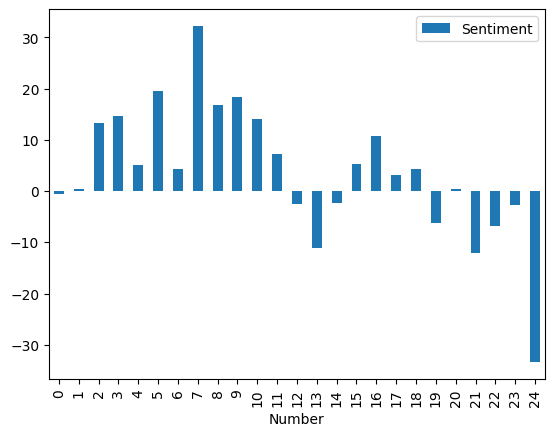

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment=[]
#make a dataframe
df=pd.DataFrame(r_j_scenes)
#make a new list that has 0 to 24 for the scene number
number=list(range(0,25))
#make a new column Number which assigns number to each scene 
df.columns=['Number']
df['Number']=number
#iterate through each scene
for i in r_j_scenes:
  total=0
  #tokenize the scene
  rj=word_tokenize(i)
  #within each tokenized list, iterate through each word
  for j in rj:
    #if the score for a word is positive,
    if emo.polarity_scores(j)['compound']>0:
      #its new score becomes original score +1
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']+1
    #if the score is negative,
    elif emo.polarity_scores(j)['compound']<0:
      #new score becomes original -1
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']-1
    #otherwise,
    else:
      #score remains the same
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']
    #the total compound score for a scene would be sum of all scores
    total=total+emo.polarity_scores(j)['compound']
  sentiment.append(total)

#make a dataframe 
#add a sentiment column with the total sentiment scores for each scene
df['Sentiment']=sentiment
print(df)
#sort by the scene number
plot1=df.sort_values('Number')
plot1.plot(x='Number', y='Sentiment', kind='bar')


Nothing changed relative to the previous method, in terms of the total sentiment scores and bar graph.  

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [16]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [17]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

    Number  Sentiment
0        0    -0.5160
1        1     0.4390
2        2    13.3498
3        3    14.6818
4        4     5.0405
5        5    19.4683
6        6     4.3679
7        7    32.1879
8        8    16.8615
9        9    18.2797
10      10    14.0393
11      11     7.3309
12      12    -2.5775
13      13   -11.1692
14      14    -2.2934
15      15     5.2064
16      16    10.7861
17      17     3.0986
18      18     4.3607
19      19    -6.2979
20      20     0.3249
21      21   -12.1500
22      22    -6.7841
23      23    -2.7154
24      24   -33.3969


<AxesSubplot: xlabel='Number'>

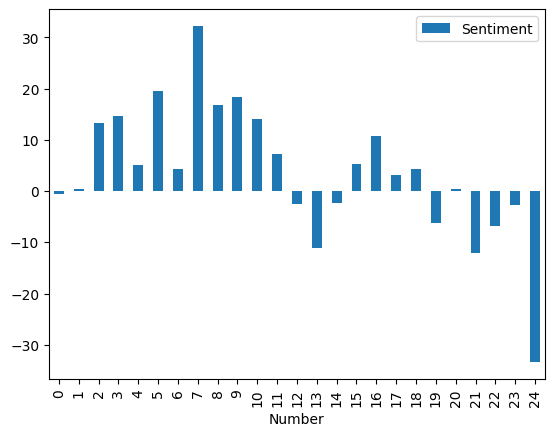

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment=[]
#make a dataframe
df=pd.DataFrame(r_j_scenes)
#make a new list that has 0 to 24 for the scene number
number=list(range(0,25))
#make a new column Number which assigns number to each scene 
df.columns=['Number']
df['Number']=number
#iterate through each scene
for i in r_j_scenes:
  total=0
  #tokenize the scene
  rj=word_tokenize(i)
  #within each tokenized list, iterate through each word
  for j in rj:
    if j in positive_words:
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']+1
    elif j in negative_words:
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']-1
    else:
      #score remains the same
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']
    #the total compound score for a scene would be sum of all scores
    total=total+emo.polarity_scores(j)['compound']
  sentiment.append(total)

#make a dataframe 
#add a sentiment column with the total sentiment scores for each scene
df['Sentiment']=sentiment
print(df)
#sort by the scene number
plot1=df.sort_values('Number')
plot1.plot(x='Number', y='Sentiment', kind='bar')


Nothing changed compared to the previous plot. 

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

-2.3389
-4.261699999999999
-7.030500000000001
7.137399999999999
4.1697999999999995
10.090099999999998
3.021299999999999
3.7272
4.046899999999999
8.8506
4.637199999999999
1.6731000000000005
5.555700000000001
3.0858999999999996
6.372000000000001
5.8268
2.044
2.030000000000001
12.469
13.6602
7.739200000000001
6.211900000000001
5.578099999999999
5.496700000000001
5.724100000000002
3.3213999999999997
5.3995000000000015
5.908400000000001
10.028100000000002
3.3032999999999997
4.6217000000000015
-4.012899999999998
-0.4830000000000001
4.939000000000001
-4.115399999999999
-7.7564
-12.556799999999996
-2.2684
-5.1104
10.5014
7.4613000000000005
0.4773999999999999
-5.981999999999999
3.2633999999999994
6.6141000000000005
8.373000000000001
-2.0639000000000003
1.5052999999999988
1.4290000000000003
6.736100000000002
-7.7684999999999995
0.974
-8.3601
-7.541
4.7896
-1.0615
-8.276299999999999
-5.0226
-4.0239
-2.1377
-2.7708999999999997
-6.7357
-8.790799999999999
-6.401000000000002
[0, 1, 2, 3, 4, 5, 6, 7, 

<AxesSubplot: xlabel='Number'>

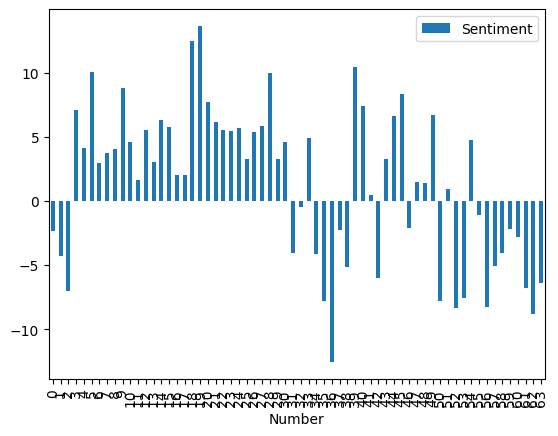

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sentiment=[]
#make a dataframe


#make a new list that has 0 to 24 for the scene number

#convert list to string
rjs=" ".join(r_j_scenes)
#tokenize
rjtoken=word_tokenize(rjs) 
i=0
n=500
for i in range(0,len(rjtoken),n):
  total=0
  rj=rjtoken[i:i+500]
  for j in rj:
    if j in positive_words:
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']+1
    elif j in negative_words:
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']-1
    else:
    #score remains the same
      emo.polarity_scores(j)['compound']=emo.polarity_scores(j)['compound']
  #the total compound score for a scene would be sum of all scores
    total=total+emo.polarity_scores(j)['compound']
  sentiment.append(total)
  new=[]
  new=sentiment[-1]
  print(new)

#after running once, the range becomes 500:1000,,,
#make a dataframe 
#add a sentiment column with the total sentiment scores for each scene

number=(i/500)
num=list(range(0,64))
print(num)
df=pd.DataFrame(({'Sentiment':sentiment, 'Number':num}))
#make a new list that has 0 to 24 for the scene number


print(df)
#sort by the scene number
plot1=df.sort_values('Number')
plot1.plot(x='Number', y='Sentiment', kind='bar')




There are more values that are relatively smaller. However, the overall trend seems to be similar. 

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would personally use the third method because it makes the most sense to me and it is easier to explain the process (i.e. going through each word and see whether if it is in the positive or negative word list. Then, we would simply do the calculation according to the equation and see the evolution of sentiment in Romeo and Juliet via graph).